# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
df = pd.read_csv("key_attr_players.csv")
df

,Name,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,GroupedPosition
0,L. Messi,0,0,81,89,90,94,34,64,84,...,96,20,35,24,6,11,15,14,8,MF
1,K. Benzema,1,1,80,88,83,87,39,78,75,...,90,43,24,18,13,11,5,5,7,FW
2,R. Lewandowski,2,1,75,91,79,86,44,83,71,...,88,35,42,19,15,6,12,8,10,FW
3,K. De Bruyne,2,2,74,88,93,87,64,77,94,...,89,68,65,53,15,13,5,10,13,MF
4,K. Mbappé,2,0,97,89,80,92,36,76,78,...,88,26,34,32,13,5,7,11,6,FW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,1,1,68,48,43,51,31,33,40,...,47,39,29,27,6,9,5,13,8,MF
18535,Yang Dejiang,1,1,55,37,41,47,48,39,34,...,45,46,50,52,6,12,11,8,6,MF
18536,L. Mullan,2,1,64,40,49,52,37,35,41,...,59,39,37,48,11,12,8,7,12,MF
18537,D. McCallion,1,1,52,24,25,32,52,41,21,...,41,50,54,54,8,14,13,7,8,DF


# Splitting Features & Target

In [3]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [4]:
x.columns

Index(['AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal',
       'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

In [6]:
print("Shape of X Train =",x_train.shape)
print("Shape of Y Train =",y_train.shape)
print("Shape of X Test =",x_test.shape)
print("Shape of Y Test =",y_test.shape)

Shape of X Train = (12977, 42)
Shape of Y Train = (12977,)
Shape of X Test = (5562, 42)
Shape of Y Test = (5562,)


# Model 1 - kNN from Scratch

In [21]:
def euclidean_distance(pn1, pn2):
    return np.sqrt(np.sum((pn1 - pn2)**2))

In [22]:
def find_k_nearest_indices(distances, k_neighbors):
    nearest_indices = np.argsort(distances)[:k_neighbors]
    return nearest_indices

In [23]:
def majority_vote(nearest_labels):
    label_counts = Counter(nearest_labels)
    return label_counts.most_common()[0][0]

In [24]:
def predict_knn(x_train, y_train, x_test, k_neighbors=5):
    y_pred = []

    for x in x_test:
        distances = []

        for x_train_instance in x_train:
            distance = euclidean_distance(x, x_train_instance)
            distances.append(distance)

        nearest_indices = find_k_nearest_indices(distances, k_neighbors)
        nearest_labels = y_train[nearest_indices]
        y_pred.append(majority_vote(nearest_labels))

    return y_pred

# Model 2 - Random Forest Classifier

In [25]:
rfc = RandomForestClassifier(random_state=7)

In [26]:
params = {
    "criterion":["gini","entropy"],
    "bootstrap":[True,False],   
}

In [27]:
gs_rfc = GridSearchCV(rfc,params,cv=10,verbose=True,n_jobs=-1,scoring="balanced_accuracy")

In [28]:
gs_rfc.fit(x_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=7), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy']},
             scoring='balanced_accuracy', verbose=True)

In [29]:
best_model = gs_rfc.best_estimator_
best_params = gs_rfc.best_params_
print("The Best fitted Model is - ",best_model)
print("--------------------------------------------------------------------------------------------------------")
print("The parameters of the Best fitted model are as follows:",best_params)

The Best fitted Model is -  RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=7)
--------------------------------------------------------------------------------------------------------
The parameters of the Best fitted model are as follows: {'bootstrap': False, 'criterion': 'entropy'}


In [30]:
best_model.score(x_test,y_test)

0.9198130169003955

In [31]:
from sklearn.metrics import classification_report

In [32]:
y_test_pred = best_model.predict(x_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          DF       0.94      0.95      0.94      1876
          FW       0.91      0.84      0.88       993
          GK       1.00      1.00      1.00       604
          MF       0.88      0.91      0.90      2089

    accuracy                           0.92      5562
   macro avg       0.93      0.92      0.93      5562
weighted avg       0.92      0.92      0.92      5562



In [33]:
joblib.dump(best_model,"Player Position Prediction Model.sav")

['Player Position Prediction Model.sav']

In [35]:
rfc = RandomForestClassifier(bootstrap=False,criterion="entropy",random_state=42)

In [36]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=42)

In [37]:
rfc.score(x_test,y_test)

0.9230492628550881

# Model Testing

In [7]:
clf = joblib.load("Player Position Prediction Model.sav")

In [8]:
clf

RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=7)

In [61]:
ip = np.array([df.iloc[-1,1:-1]])
ip

array([[1, 1, 61, 29, 35, 46, 44, 54, 38, 28, 41, 35, 29, 47, 33, 32, 29,
        38, 70, 53, 58, 45, 76, 29, 66, 56, 55, 28, 47, 40, 36, 39, 35,
        32, 47, 44, 43, 13, 13, 6, 14, 14]], dtype=object)

In [63]:
import predict_position
op = predict_position.predict(ip)
print(op)

Defender


In [15]:
from sklearn.metrics import roc_curve, auc
y_probs = clf.predict_proba(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y.nunique()):
    fpr[i],tpr[i], _ = roc_curve(y_test,y_probs[:i],pos_label=i)
    roc_auc[i] = auc(fpr[i],tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(y.nunique()):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate AUC ROC
print("AUC ROC:", roc_auc["micro"])

ValueError: Found input variables with inconsistent numbers of samples: [5562, 0]

# Custom Cross Validation

In [3]:
from sklearn.metrics import accuracy_score
def custom_cross_val(df,iterations = 10,sample_size = 25,error_margin=0.1):
    accuracies = []
    for _ in range(iterations):
        sub_df = df.sample(sample_size)
        x = sub_df.iloc[:,1:-1]
        y = sub_df.iloc[:,-1]
        
        model = joblib.load("Player Position Prediction Model.sav")
        accuracy_original = model.score(x,y)
        
        num_errors = np.abs(int(len(x)*error_margin))
        error_indices = x.sample(num_errors).index
        x_error = x.copy()
        x_error.loc[error_indices] += x_error.loc[error_indices] * error_margin
        accuracy_error = model.score(x_error,y)
        
        diff = accuracy_original - accuracy_error
        accuracies.append(diff)
    avg_acc_diff = sum(accuracies)/len(accuracies)
    return(avg_acc_diff)

In [4]:
acc_diff = []
margins = np.arange(-0.25,0.25,0.01)
for margin in margins:
    acc_diff.append(custom_cross_val(df,error_margin=margin))

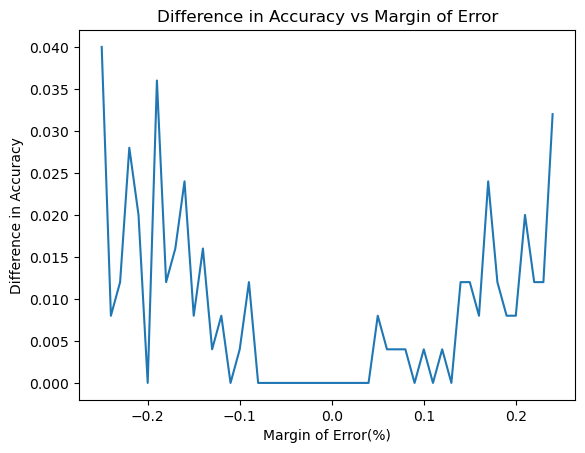

In [5]:
x = margins
y = acc_diff

plt.plot(x,y)
plt.title("Difference in Accuracy vs Margin of Error")
plt.xlabel("Margin of Error(%)")
plt.ylabel("Difference in Accuracy")
plt.show()